In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [9]:
n_=['']*21
for i in range(0,21):
    n_[i]='sens_meas_'+str(i+1)
col_names=['unit_no', 'time', 'op_set1', 'op_set2', 'op_set3']+ n_



In [10]:
df=pd.read_csv('./data/train_FD003.txt', delimiter=" ", names=col_names, header=None, index_col=False)
df=df.set_index('unit_no')

In [11]:
##Create Remaining Useful Life column (RUL), which is = to the number of readings before failure 
# (the last reading for each unit is in this dataset represents failure)

ruldf=df[['time']].groupby(by='unit_no').max()

for n in ruldf.index:
    df.loc[n,'RUL'] = ruldf.loc[n,'time']-df.loc[n,'time']

In [13]:
df[['time']]

,time
unit_no,
1,1
1,2
1,3
1,4
1,5
...,...
100,148
100,149
100,150


##Concatenate files:

files = glob('./data/train_FD00*.txt')
frames = [wrangle(files) for file in files]
df=pd.concat(frames,axis=0)

df=pd.concat(frames,axis=0)

In [39]:
# uni=df.loc[:,(df.nunique()==1)].columns
# df=df.drop(columns=uni)

In [218]:
# df=pd.read_csv('./data/train_FD001.txt', delimiter=" ")
pd.set_option('display.max_columns',50)
df.head()

,time,op_set1,op_set2,op_set3,sens_meas_1,sens_meas_2,sens_meas_3,sens_meas_4,sens_meas_5,sens_meas_6,sens_meas_7,sens_meas_8,sens_meas_9,sens_meas_10,sens_meas_11,sens_meas_12,sens_meas_13,sens_meas_14,sens_meas_15,sens_meas_16,sens_meas_17,sens_meas_18,sens_meas_19,sens_meas_20,sens_meas_21,RUL
unit_no,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,21.61,553.97,2387.96,9062.17,1.3,47.30,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537,258.0
1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,21.61,554.55,2388.00,9061.78,1.3,47.23,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491,257.0
1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,21.61,554.43,2388.03,9070.23,1.3,47.22,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669,256.0
1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,21.61,555.21,2388.00,9064.57,1.3,47.24,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951,255.0
1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,21.61,554.74,2388.04,9076.14,1.3,47.15,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583,254.0


In [98]:
df['sens_meas_19'].value_counts()

100.0    24720
Name: sens_meas_19, dtype: int64

In [99]:
df.nunique()

unit_no          100
time             525
op_set1          160
op_set2           14
op_set3            1
sens_meas_1        1
sens_meas_2      334
sens_meas_3     3358
sens_meas_4     4383
sens_meas_5        1
sens_meas_6       17
sens_meas_7     1854
sens_meas_8      161
sens_meas_9     7114
sens_meas_10       4
sens_meas_11     170
sens_meas_12    1772
sens_meas_13     163
sens_meas_14    6320
sens_meas_15    3122
sens_meas_16       1
sens_meas_17      12
sens_meas_18       1
sens_meas_19       1
sens_meas_20     165
sens_meas_21    6440
dtype: int64

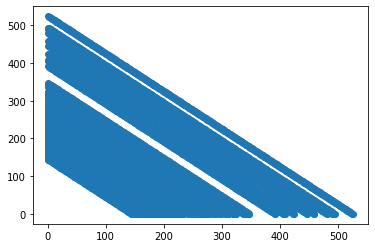

In [219]:
plt.scatter(df['time'], df['RUL'])

Complete these tasks for your project, and document your decisions.

Choose your target. Which column in your tabular dataset will you predict?
**The column to be used is the 'Remaining Useful Life' column**
Is your problem regression or classification?
**Classification**
How is your target distributed?

Classification: How many classes? Are the classes imbalanced?
Regression: Is the target right-skewed? If so, you may want to log transform the target.
Choose your evaluation metric(s).
**The nature of the data makes this target neither left nor right skewed**

Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
**Probably RMSE and R2**
Choose which observations you will use to train, validate, and test your model.
**All**
Are some observations outliers? Will you exclude them?
**Haven't found any, only will exclude columns where all values are the same**
Will you do a random split or a time-based split?
**Data is already split randomly**
Begin to clean and explore your data.
Begin to choose which features, if any, to exclude. Would some features "leak" future information?

In [107]:
df1=pd.read_csv('./data/RUL_FD001.txt', header=None)
df1

,0
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117
